In [11]:
import pandas as pd
import requests
import json

In [12]:
class LeetCodeFetcher:
    def __init__(self,username):
        self.url = 'https://leetcode.com/graphql'
        self.query = {
                'query': '''
                    query userProblemsSolved($username: String!) {
                        matchedUser(username: $username) {
                            username
                            profile {
                                realName
                                ranking
                            }
                            badges {
                                displayName
                                icon
                                creationDate
                            }
                            submitStatsGlobal {
                                acSubmissionNum {
                                    difficulty
                                    count
                                }
                            }
                        }
                    }
                ''',
                'variables': {'username': username},
                'operationName': 'userProblemsSolved',
            }
    def scrap(self):
        response = requests.Session().post(self.url,json=self.query)
        res = {
            'username' : '',
            'name':'',
            'All' : 0,
            'Easy' : 0,
            'Medium' : 0,
            'Hard' : 0,
            'Rank' : -1,
            'Badges' : []
        }
        if response.status_code == 200 and response.json()['data']['matchedUser'] != None: 
            data = response.json()['data']
            res['username'] = data['matchedUser']['username']
            res['name'] = data['matchedUser']['profile']['realName']
            res['Rank'] = (data['matchedUser']['profile']['ranking'])
            res['Badges'] = (data['matchedUser']['badges'])
            problems_solved_data = data['matchedUser']['submitStatsGlobal']['acSubmissionNum']
            res['All'] = problems_solved_data[0]['count']
            res['Easy'] = problems_solved_data[1]['count']
            res['Medium'] = problems_solved_data[2]['count']
            res['Hard'] = problems_solved_data[3]['count']
        else:
            print("Status code",response.status_code)
            res['name'] = response.json()['errors']
        return res
        

In [13]:
with open('json/leetcode_new.json') as file:
    users = json.load(file)

In [14]:
RollNumber = []
username = []
name = []
Rank = []
All = []
Easy = []
Medium = []
Hard = []
Badges = []

In [15]:
jsoned_data = []

In [16]:
c = 0
for i in users.keys():
    c+=1
    RollNumber.append(i)
    res = (LeetCodeFetcher(users[i]).scrap())
    badges = ''
    for badge in res['Badges']:
        badges+=","+badge["displayName"]
    badges = badges.removeprefix(',')
    Badges.append(badges)
    res['RollNumber'] = i
    jsoned_data.append(res)
    username.append(res['username'])
    name.append(res['name'])
    Rank.append(res['Rank'])
    All.append(res['All'])
    Easy.append(res['Easy'])
    Medium.append(res['Medium'])
    Hard.append(res['Hard'])
    print(c)

1
2
3
4
5
6
7
8
Status code 200
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
Status code 200
29
30
31
32
33
34
35
36
37
38
Status code 200
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
Status code 200
57
58
59
60
Status code 200
61
Status code 200
62
63
64
65
66
67
68
69
70
71
Status code 200
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
Status code 200
125
126
127
128
129
130
131
132
133
134
Status code 200
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
Status code 200
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
Status code 200
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233


In [17]:
df = pd.DataFrame({
    'RollNumber':RollNumber ,
    'username':username,
    'name':name,
    'Rank':Rank,
    'All':All,
    'Easy':Easy,
    'Medium':Medium,
    'Hard':Hard,
    'Badges':Badges,
})

In [18]:
df

,RollNumber,username,name,Rank,All,Easy,Medium,Hard,Badges
0,23955A6701,Akshaya_Sadhu,Sadhu_Akshaya,1037751,103,65,33,5,
1,23955A6703,bhavani__08,Bhavani Ramagani,655970,165,72,81,12,50 Days Badge 2024
2,22951A0487,PenkeyMahitha,Mahitha,1695683,51,36,15,0,
3,23955A6614,Sai_ganesh23,Sai_ganesh23,3197279,16,6,10,0,
4,22951A0562,kanchan62,Kanchan Thapa,772802,140,47,81,12,
...,...,...,...,...,...,...,...,...,...
797,22951A05A8,harsha1609,harsha1609,2168604,34,17,16,1,
798,22951A0543,Sushma-2610,Sushma-2610,1488260,62,32,28,2,
799,22951A0505,chukkala_adithya,chukkala_adithya,1627892,54,27,26,1,
800,22951A3385,valija_sathwika,valija_sathwika,2029776,38,20,16,2,


In [19]:
import datetime
date = (datetime.datetime.date(datetime.datetime.now()))

In [20]:
df.to_csv(f"results/leetcode_data_at-{str(date.day)+"-"+str(date.month)+"-"+str(date.year)}.csv")

In [21]:
with open(f'results/leetcode_fetched-{str(date.day)+"-"+str(date.month)+"-"+str(date.year)}.json', "w") as json_file:
    json.dump(jsoned_data, json_file, indent=4)

#  --------------------------      Data Analysis       ------------------------

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
teal_palette = [
          '#e0f5f6',
          '#b8e4e5',
          '#90d3d4',
          '#68c2c3',
          '#40b1b2',
        ]
sns.set_palette(teal_palette[::-1])
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=teal_palette[::-1])

In [24]:
df.describe()

,Rank,All,Easy,Medium,Hard
count,8.020000e+02,802.000000,802.000000,802.000000,802.000000
mean,1.453578e+06,80.376559,44.115960,32.059850,4.200748
std,9.651045e+05,68.032051,38.945691,30.288276,6.104038
min,-1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,8.797005e+05,40.000000,23.000000,14.000000,1.000000
50%,1.339800e+06,65.000000,36.000000,25.000000,2.000000
75%,1.789530e+06,100.000000,54.000000,39.000000,5.000000
max,5.000001e+06,425.000000,375.000000,226.000000,53.000000


# Rank analysis

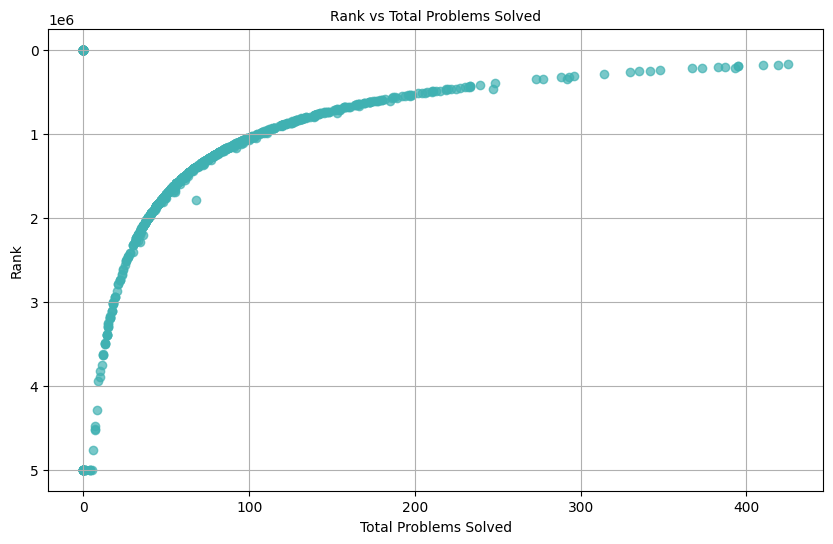

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df['All'], df['Rank'], color=teal_palette[-1], alpha=0.7)  # Medium teal
plt.title('Rank vs Total Problems Solved', fontsize=10)
plt.xlabel('Total Problems Solved', fontsize=10)
plt.ylabel('Rank', fontsize=10)
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()



# Individual Performance of Top 20 Profiles

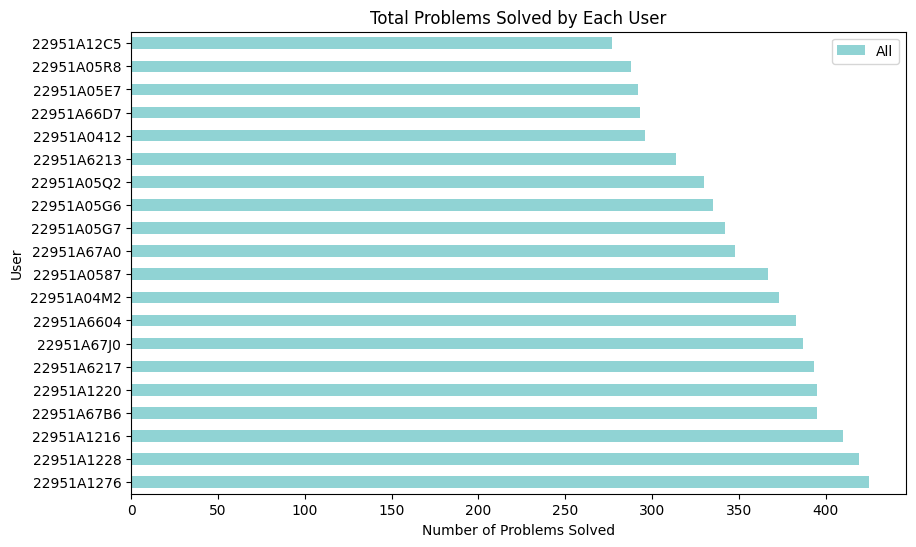

In [26]:
top_users = df.nlargest(20, 'All')
top_users.plot(x='RollNumber', y='All', kind='barh', color=teal_palette[-3], figsize=(10, 6))

plt.title('Total Problems Solved by Each User')
plt.xlabel('Number of Problems Solved')
plt.ylabel('User')
plt.show()


# Problem-Solving Distribution

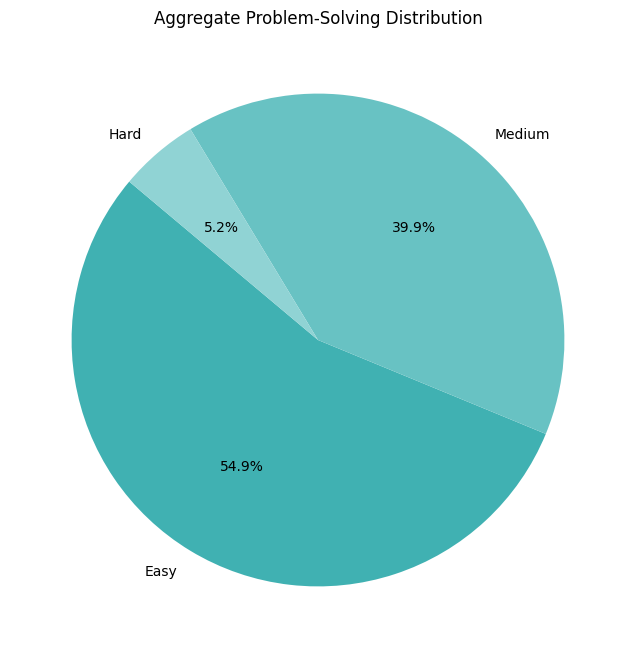

In [27]:
difficulty_totals = df[['Easy', 'Medium', 'Hard']].sum()

difficulty_totals.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=140, colors=teal_palette[::-1])

plt.title('Aggregate Problem-Solving Distribution')
plt.ylabel('')
plt.show()


#  Advanced: Grouped Comparisons

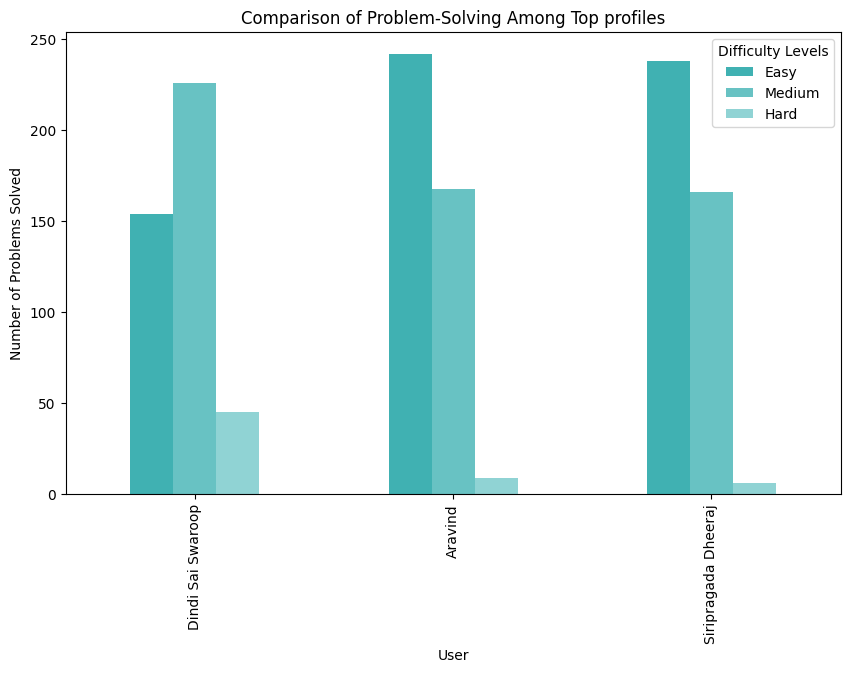

In [28]:
top_users = df.nlargest(3, 'All')

top_users.plot(x='name', y=['Easy', 'Medium', 'Hard'], kind='bar', figsize=(10, 6))

plt.title('Comparison of Problem-Solving Among Top profiles')
plt.xlabel('User')
plt.ylabel('Number of Problems Solved')
plt.legend(title="Difficulty Levels")
plt.show()


# Developed By 22951A05G8.